In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

About Dataset
Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Acknowledgements

Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

Purpose

This dataset can be used for predictive data analytics purpose.

In [2]:
df = pd.read_csv("C:\\Users\\PHUONG THANH\\Desktop\\MY DOCUMENTS\\Python1\\Project\\archive\\supermarket_sales - Sheet1.csv")

In [3]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [4]:
df['gross margin percentage'].unique()

array([4.76190476])

Gross margin percentage for all product lines is 4.76190476 %. So we can drop the gross margin percentage column in dataframe.

Open time is 10a.m to 9 p.m that mentioned in 'About Dataset' so we also can drop it.

In [5]:
df= df.drop(columns=['gross margin percentage','Time'], axis=0)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3


In [6]:
# Convert Date column to datatime 
df['Date']= pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Tax 5%         1000 non-null   float64       
 9   Total          1000 non-null   float64       
 10  Date           1000 non-null   datetime64[ns]
 11  Payment        1000 non-null   object        
 12  cogs           1000 non-null   float64       
 13  gross income   1000 non-null   float64       
 14  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), 

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


BIG QUESTION: How is the business situation of three branch supermarkets ? 
Relevant questions: 
- Which product line is the best-selling at each branch?
- What is the purchasing rate between men and women? 
- Comparison between members and non-members at each branch.
- What is the dominant payment methods at each branch? 
- Three-month business performance of three branches

In [155]:
n=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']

In [12]:
# Quantity of buying product line at brand A, B or C
a =['Branch','Product line']
Compare_product_line= df.groupby(a)['Total'].sum().reset_index()
Compare_product_line

,Branch,Product line,Total
0,A,Electronic accessories,18317.1135
1,A,Fashion accessories,16332.5085
2,A,Food and beverages,17163.1005
3,A,Health and beauty,12597.7530
4,A,Home and lifestyle,22417.1955
5,A,Sports and travel,19372.6995
6,B,Electronic accessories,17051.4435
7,B,Fashion accessories,16413.3165
8,B,Food and beverages,15214.8885
9,B,Health and beauty,19980.6600


Text(0.5, 1.0, 'Product line by Branch A')

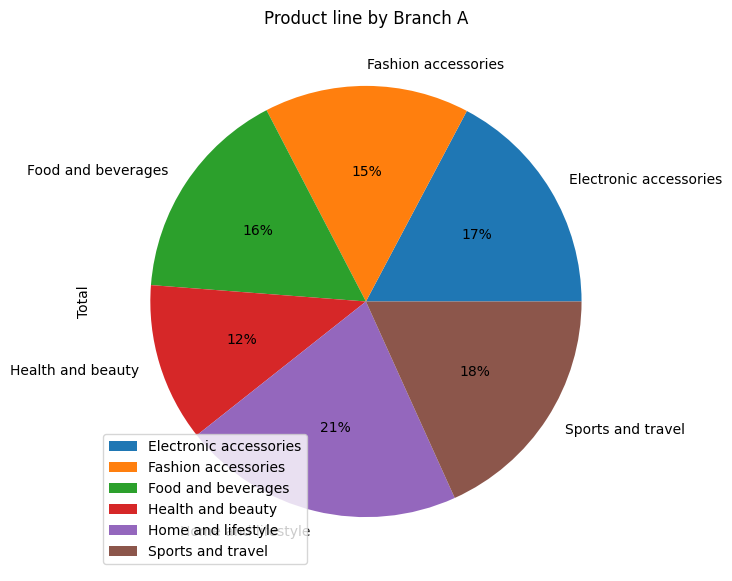

In [157]:
Plot_A = Compare_product_line[Compare_product_line['Branch']=='A'].plot(kind='pie', y='Total',autopct='%1.0f%%', labels= n, figsize=(7,7))
plt.title('Product line by Branch A')

Text(0.5, 1.0, 'Product line by Branch B')

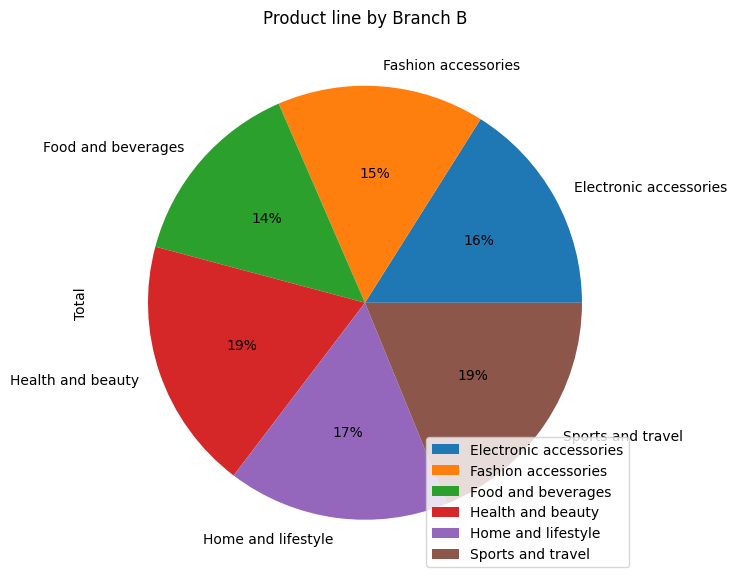

In [158]:
Plot_B = Compare_product_line[Compare_product_line['Branch']=='B'].plot(kind='pie', y='Total',autopct='%1.0f%%', labels= n, figsize=(7,10))
plt.title('Product line by Branch B')

Text(0.5, 1.0, 'Product line by Branch C')

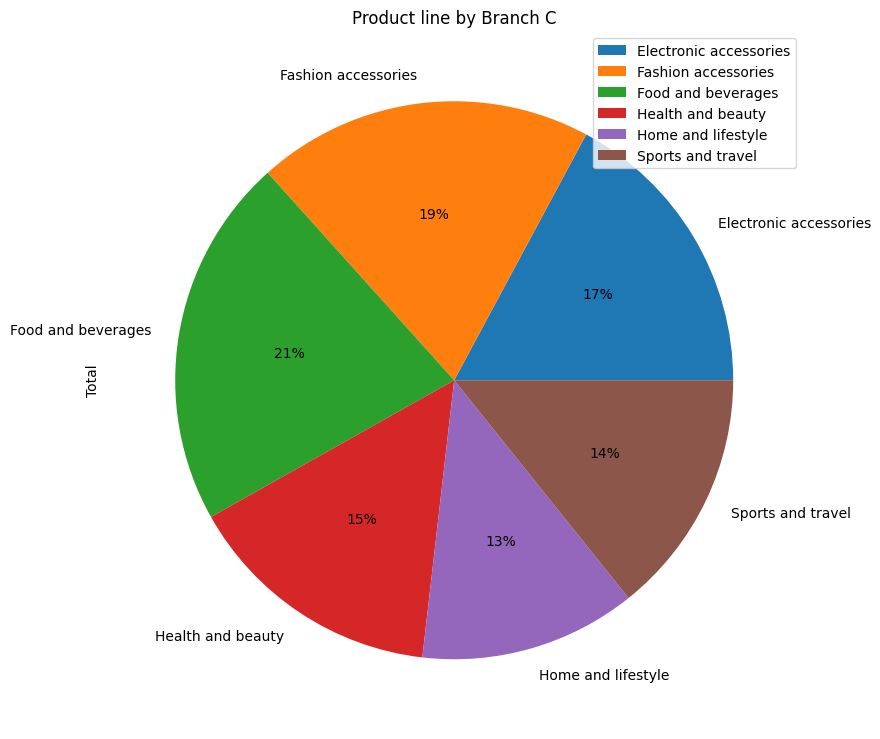

In [159]:
Plot_C = Compare_product_line[Compare_product_line['Branch']=='C'].plot(kind='pie', y='Total',autopct='%1.0f%%', labels= n, figsize=(9,10))
plt.title('Product line by Branch C')

In three charts, we can see that the product line that sell the most: 
+ Branch A: Home and lifestyle, Sports and travel, Electronic accessories 
+ Branch B: Sports and travel, Health and beauty, Home and lifestyle	
+ Branch C: Food and beverages, Fashion accessories, Electronic accessories	


In [160]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4


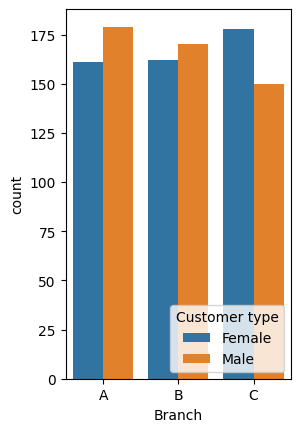

In [17]:
# What is the purchasing rate between men and women?
plt.subplot(122)
sns.countplot(data = df,
              x = 'Branch',
              hue= 'Gender',
              order= ['A','B','C']
              )
plt.legend(loc='lower right', title='Customer type')

We can observe from the chart above that branch A and B have a higher ratio of male consumers. Because "Sports and travel" are the best-selling lines for both branches.

Additionally, branch C has a greater proportion of female customers. This is evident from the fact that the most common product categories in branch C are "Food and beverages", and "Fashion accessories"


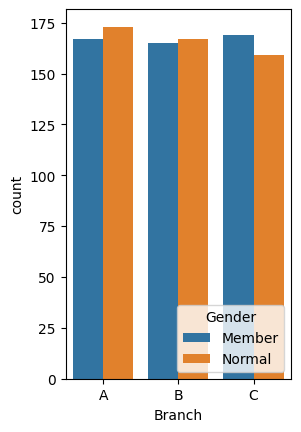

In [16]:
# Comparison between members and non-members at each branch
plt.subplot(122)
sns.countplot(data = df,
              x = 'Branch',
              hue= 'Customer type',
              order= ['A','B','C']
              )
plt.legend(loc='lower right', title='Gender')

The chart shows that Branch A and B have lower percentage of customers who are members than normal customers. 
Therefore, Branch A and B should focus on building policies to attract customers to register to become the member.

In [162]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4


In [163]:
Compare_quantity_rating= df.groupby('Branch')[['Quantity','Rating']].agg({'Quantity':'sum','Rating':'mean'}).reset_index()
Compare_quantity_rating

,Branch,Quantity,Rating
0,A,1859,7.027059
1,B,1820,6.818072
2,C,1831,7.072866


In [164]:
Total_sales= df.groupby('Branch')['Total'].sum().reset_index()
Total_sales

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


When we compare the quantity of sales, branch A outperforms the other two branches. However branch C is the highest ranked and has the largest sales.

In comparison to the other two branches, Branch B has the least sales and the lowest review rating. In order to improve client attraction, businesses must raise the quality of their services and products.

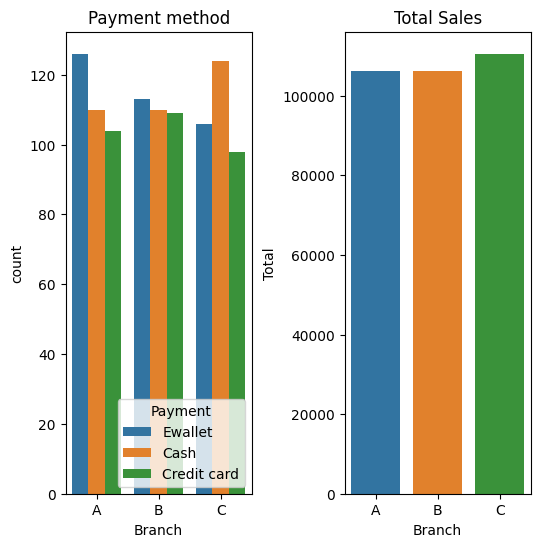

In [165]:
# What is the dominant payment methods at each branch? 
plt.figure(figsize=(6,6))
plt.subplot (121)
sns.countplot(
    data= df,
    x='Branch',
    hue='Payment',
    order=['A','B','C']
)
plt.legend(loc='lower right', title='Payment')
plt.title('Payment method')

plt.subplot(122)
sns.barplot(
    data= Total_sales,
    x='Branch',
    y='Total',
    order=['A','B','C'])
plt.title('Total Sales')

plt.subplots_adjust(wspace= 0.5)
plt.show()

The chart above show that:
+ Branch A and B: The number of customers paying by Ewallet is more than the other two payment methos. This demonstrates that residents in Yangon city tend to use technology in their daily lives. Businesses can encourage buy demand on a website or app that has a payment connection for an e-wallet in order to boost sales.
+ In contrast, Branch C has the most clients who pay in cash.

In [166]:
df['Month']= df['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,2


In [167]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,2


<Axes: xlabel='Branch', ylabel='Total'>

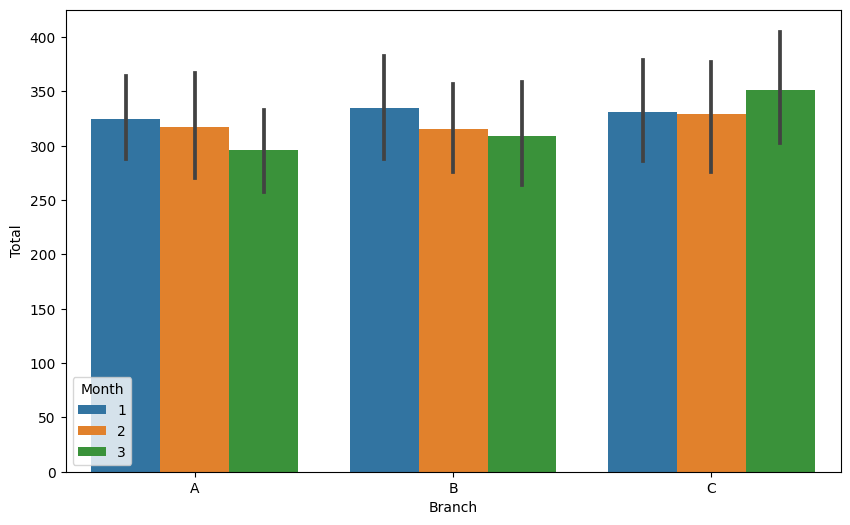

In [168]:
# Three-month business performance of three branches
plt.figure(figsize = (10, 6)) 
sns.barplot(data = df,
              x = 'Branch',
              y = 'Total',
              hue='Month',
              order=['A','B','C']
             )

Compared to branches C, business operation at branches A and B tends to decline. Businesses must develop marketing strategies to boost sales at locations A and B.

Summary:

Regarding this data set's limitations, we can only track the fluctuations in sales data over a period of three months, which makes it difficult to clearly depict the three branches' operation.